# Avaliação do modelo a partir de métricas (Classificação)

Importação das Bibliotecas

In [238]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [239]:
pip install util-gfsilveira

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [240]:
#encontrar e caminhar pelos arquivos
import os
#estruturação dos dados de imagens para matriz numérica
import numpy as np
#salvar os dados em diferentes arquivos
import joblib
#deixando os arquivos salvos com a data do dia que o código correu
from util import meus_uteis, timeProcess, mask_corr_graphic, printLis



In [241]:
#separando os dados em treino e teste
from sklearn.model_selection import train_test_split
#separando as categorias da classificação
from keras.utils import to_categorical

In [242]:
#avaliação da métrica do modelo
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report #qualidade do algoritmo
#camadas do cnn
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten #camadas da rede neural
#selecioando sequential da rede
from keras.models import Sequential #rede neural

In [243]:
import seaborn as sns #plotar gráficos
import matplotlib.pyplot as plt #plotar gráficos

In [244]:
#serve para adicionar data 
data = timeProcess()[1]

In [245]:
from keras.models import load_model


Importando dados dos 10% dos dados usados para treinar o modelo original (validação)

In [246]:
img_validacao = joblib.load('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/Modelo original e reteste + dados validação/imagens_validação_10%_class_2023-5-10.gz') #carregando arquivo
img_validacao.shape

(1100, 200, 200, 3)

In [247]:
rot_validacao = joblib.load('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/Modelo original e reteste + dados validação/rótulos_validação_10%_class_2023-5-10.gz') #carregando arquivo
rot_validacao.shape

(1100,)

Modelo salvo a partir do CNN original treinado por 90% dos dados

In [248]:
#modelo salvo SEM FILTRO - 90% das imagens
#model= load_model('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/Modelo original e reteste + dados validação/modelo_class_88.8_modelo_sem_filtro%_2023-5-10.h5')
#model

In [249]:
#modelo salvo COM FILTRO - 10% das imagens
model= load_model('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/Modelo original e reteste + dados validação/modelo_class_93.03_modelo_reteste%_2023-5-10.h5')
model

Separando os valores em treinamento e teste para correr o modelo salvo

In [250]:
X_train, X_test, y_train, y_test = train_test_split(img_validacao,rot_validacao, test_size=0.3, random_state=0)
#variáveis recebem o número de imagens para tes e treino
print(f'{X_train.shape} \n{X_test.shape} \n{y_train.shape} \n{y_test.shape}')

(770, 200, 200, 3) 
(330, 200, 200, 3) 
(770,) 
(330,)


In [251]:
#variável salva para instanciar os rótulos na curva ROC, pois quando passa no to_categorical os rótulos formam vários arrays.
test_y = y_test


In [252]:
#criando as categorias usando o to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

A função to_categorical (não se sabe a razão) adiciona uma classe a mais nos rótulos, impedindo a plotagem do gráfico da curva ROC. Para contornar a situação, buscando em qual das colunas do array voltava apenas valores 0 (zeros) e encontramos na primeira coluna.

In [253]:
#Aqui foi salvo novamente na variavel y_test excluindo a primeira coluna gerado pelo to_categorical
y_test = y_test_cat[:,1:]
y_test.shape

(330, 8)

In [254]:
#Aqui foi salvo novamente na variavel y_train excluindo a primeira coluna gerado pelo to_categorical
y_train = y_train_cat[:,1:]
y_train.shape

(770, 8)

Correndo novamente o treinamento (retreino)

In [255]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [256]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=18)

In [257]:
# fit model
history = model.fit(X_train,y_train,
                    validation_data=(X_test, y_test), 
                    epochs=200, verbose=2, 
                    callbacks=[es]
                     )

Epoch 1/200
25/25 - 3s - loss: 0.0095 - accuracy: 0.9974 - val_loss: 0.3896 - val_accuracy: 0.9273 - 3s/epoch - 132ms/step
Epoch 2/200
25/25 - 1s - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.3130 - val_accuracy: 0.9242 - 1s/epoch - 43ms/step
Epoch 3/200
25/25 - 1s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3247 - val_accuracy: 0.9394 - 1s/epoch - 43ms/step
Epoch 4/200
25/25 - 1s - loss: 0.0148 - accuracy: 0.9935 - val_loss: 0.3388 - val_accuracy: 0.9061 - 1s/epoch - 43ms/step
Epoch 5/200
25/25 - 1s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3424 - val_accuracy: 0.9212 - 1s/epoch - 44ms/step
Epoch 6/200
25/25 - 1s - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3327 - val_accuracy: 0.9273 - 1s/epoch - 46ms/step
Epoch 7/200
25/25 - 1s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3373 - val_accuracy: 0.9242 - 1s/epoch - 46ms/step
Epoch 8/200
25/25 - 1s - loss: 6.3748e-04 - accuracy: 1.0000 - val_loss: 0.3057 - val_accuracy: 0.9303 - 1s/epoch - 45ms/step
Epoch 9/200
25/25 -

In [258]:
# #Treinando o modelo
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

#AVALIANDO A ACURÁCIA

Matriz de Confusão

In [259]:
#avaliação da matriz de confusão
prev = model.predict(X_test)
y_test_matrix = [np.argmax(t) for t in y_test]
y_pred_matrix = [np.argmax(t) for t in prev]
confusion_matrix(y_test_matrix, y_pred_matrix)

11/11 [==============================] - 0s 15ms/step


array([[41,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 27,  0,  0,  2,  0,  3,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  3,  0,  0,  0],
       [ 0,  2,  0,  2, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 51,  0,  0],
       [ 0,  8,  0,  1,  5,  0, 37,  0],
       [ 1,  0,  0,  0,  0,  0,  0, 27]])

In [260]:
classification = classification_report(y_test_matrix, y_pred_matrix)
print(classification)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       0.73      0.84      0.78        32
           2       1.00      1.00      1.00        46
           3       0.91      0.91      0.91        32
           4       0.82      0.92      0.87        49
           5       1.00      1.00      1.00        51
           6       0.93      0.73      0.81        51
           7       1.00      0.96      0.98        28

    accuracy                           0.92       330
   macro avg       0.92      0.92      0.92       330
weighted avg       0.92      0.92      0.92       330



HEATMAP - Matriz de confusão

In [261]:
import pandas as pd

In [262]:
array_heatmap = confusion_matrix(y_test_matrix, y_pred_matrix)
#array_heatmap

In [263]:
data_heat = pd.DataFrame(array_heatmap)
data_heat.columns = ['THP1', 'SH-SY5Y','A172','MAYV','HUH7','VERO6','A549','3T3']
data_heat.index = ['THP1', 'SH-SY5Y','A172','MAYV','HUH7','VERO6','A549','3T3']

type(data_heat)


pandas.core.frame.DataFrame

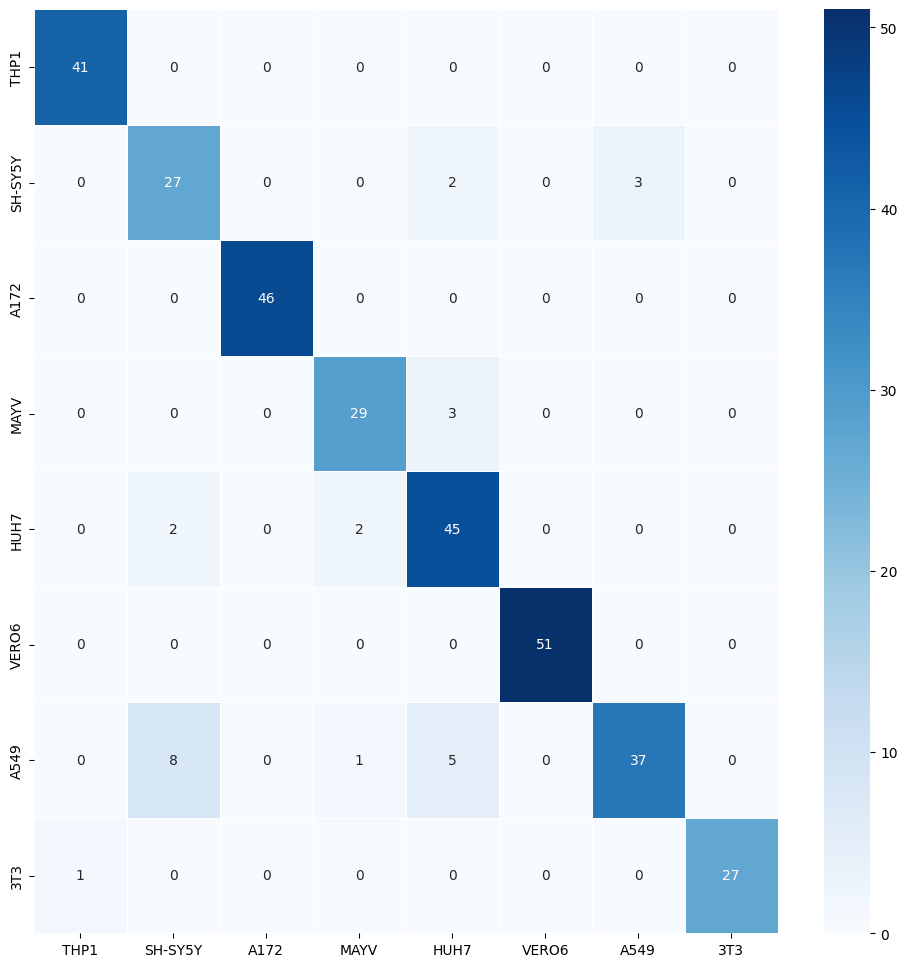

In [264]:
#plt.figure(figsize=(12,12))
#mask = mask_corr_graphic(len(prev[0]) -1)
fig, ax = plt.subplots(figsize=(12,12))
_ = sns.heatmap(data_heat, cmap = "Blues", linewidth = 0.5, annot = True, fmt=".0f")
#cmp = cor, linewidth = distancia das linhas, annot = valores nos quadrados, fmt = formato do valor, mark = retira os valores acima da matriz

Porcentagem acurácia

In [265]:
#porcentagem da acurácia do modelo
precision = accuracy_score(y_test_matrix, y_pred_matrix)
print(f'Accuracy Score: {round(precision*100, 2)}%')

Accuracy Score: 91.82%


Precision, recall, f1-score e support

In [266]:
classification = classification_report(y_test_matrix, y_pred_matrix)
print(classification)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       0.73      0.84      0.78        32
           2       1.00      1.00      1.00        46
           3       0.91      0.91      0.91        32
           4       0.82      0.92      0.87        49
           5       1.00      1.00      1.00        51
           6       0.93      0.73      0.81        51
           7       1.00      0.96      0.98        28

    accuracy                           0.92       330
   macro avg       0.92      0.92      0.92       330
weighted avg       0.92      0.92      0.92       330



In [267]:
data = timeProcess()[1]
#model.save('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/modelo_class_93.03_modelo_reteste%_'+data+'.h5')

CURVA ROC

In [268]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [269]:
import scikitplot as skplt


11/11 [==============================] - 0s 17ms/step


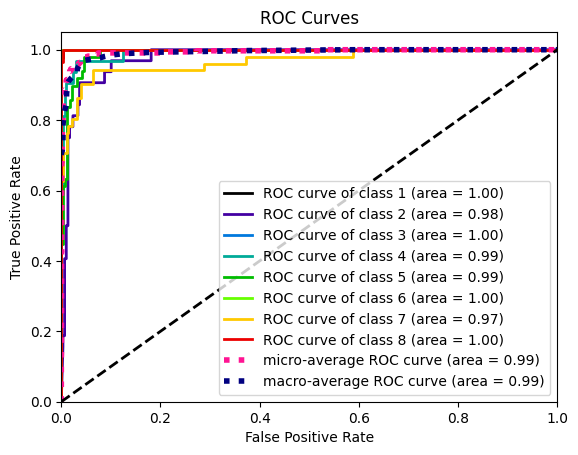

In [270]:
nb = model #chamando o algoritmo
probas = nb.predict(X_test) #previsão
skplt.metrics.plot_roc(y_true=test_y, y_probas=probas) #infos do gráfico
plt.show() #plot